In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rottentomatoes/rotten_tomatoes_movies.csv
/kaggle/input/rottentomatoes/rotten_tomatoes_critic_reviews.csv
/kaggle/input/glove-embeddings/glove.6B.100d.txt


In [1]:
# Importing the Datasets
import pandas as pd
Movies = pd.read_csv("/kaggle/input/rottentomatoes/rotten_tomatoes_movies.csv")
Reviews = pd.read_csv("/kaggle/input/rottentomatoes/rotten_tomatoes_critic_reviews.csv")

In [2]:
import numpy as np

# Dropping rows with NA values
Reviews = Reviews.dropna()

# Dropping Duplicates so that there is only one entry per Movie.
Reviews = Reviews.drop_duplicates(subset=['rotten_tomatoes_link'], keep = "first")
Reviews.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
153,m/0878835,Erik Childress,False,eFilmCritic.com,Fresh,3/4,2010-01-31,Holofcener always gives us more to chew on tha...
292,m/10,Scott Weinberg,False,eFilmCritic.com,Fresh,4/5,2002-07-25,Obvious but entertaining portrayal of midlife ...
316,m/1000013-12_angry_men,Steve Rhodes,False,Internet Reviews,Fresh,4/4,2000-01-01,In a time of bloated when special effects have...
369,m/1000079-20000_leagues_under_the_sea,Dragan Antulov,False,rec.arts.movies.reviews,Fresh,7/10,2000-01-01,[The] embodiment of Disney at his best -- fami...


In [3]:
# Merging two Dataframes
newDf = pd.merge(Movies, Reviews, on = "rotten_tomatoes_link", how = "inner") 

# Dropping columns which are not required
newDf.drop(['movie_info','content_rating','genres','directors','authors','actors','original_release_date','tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count','critic_name','top_critic','publisher_name','review_type','review_date','streaming_release_date','runtime','production_company','tomatometer_status','tomatometer_rating','tomatometer_count','audience_status','audience_rating','audience_count'],axis=1,inplace=True)
newDf.head()

,rotten_tomatoes_link,movie_title,critics_consensus,review_score,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,3.5/5,Whether audiences will get behind The Lightnin...
1,m/0878835,Please Give,Nicole Holofcener's newest might seem slight i...,3/4,Holofcener always gives us more to chew on tha...
2,m/10,10,Blake Edwards' bawdy comedy may not score a pe...,4/5,Obvious but entertaining portrayal of midlife ...
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Sidney Lumet's feature debut is a superbly wri...,4/4,In a time of bloated when special effects have...
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","One of Disney's finest live-action adventures,...",7/10,[The] embodiment of Disney at his best -- fami...


In [4]:
# Fetching unique rating scale to generalize the rating
ratingList = np.unique(newDf.review_score).tolist()
max_score = []
for r in range(len(ratingList)):
    temp = ratingList[r].split("/")
    if len(temp) > 1:
        max_score.append(temp[1])
    elif len(temp) == 1:
        max_score.append(temp)
    else:
        pass
    
max_score = [i for b in map(lambda x:[x] if not isinstance(x, list) else x, max_score) for i in b]
uniq_score = np.unique(max_score)
uniq_score

array(['1', '10', '100', '20', '3', '4', '5', '6', '7', '8', '9', 'A',
       'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'D-', 'F'],
      dtype='<U3')

In [6]:
# Generalizing the all the review ratings to standard scale of 5 being highest and 0 being least.
rating = newDf.review_score.tolist()
genrat = []
for r in range(len(rating)):
    temp = rating[r].split("/")
    #print(len(temp))
    if len(temp) > 1:
        if temp[1] == '10':
            score = round(float(temp[0]) / 2)
            genrat.append(score)
        elif temp[1] == '100':
            score = round(float(temp[0]) / 20)
            genrat.append(score)
        elif temp[1] == '20':
            score = round(float(temp[0]) / 4)
            genrat.append(score)
        elif temp[1] == '3':
            score = round(float(temp[0]) * 5 / 3)
            genrat.append(score)
        elif temp[1] == '4':
            score = round(float(temp[0]) * 5 / 4)
            genrat.append(score)
        elif temp[1] == '5':
            score = round(float(temp[0]))
            genrat.append(score)
        elif temp[1] == '6':
            score = round(float(temp[0]) * 5 / 6)
            genrat.append(score)
        elif temp[1] == '7':
            score = round(float(temp[0]) * 5 / 7)
            genrat.append(score)
        elif temp[1] == '8':
            score = round(float(temp[0]) * 5 / 8)
            genrat.append(score)
        elif temp[1] == '9':
            score = round(float(temp[0]) * 5 / 9)
            genrat.append(score)
    elif len(temp) == 1:
        if temp == 'A-' or 'A' or 'A+':
            score = 5
            genrat.append(score)
        elif temp == 'B-' or 'B' or 'B+':
            score = 4
            genrat.append(score)
        elif temp == 'C-' or 'C' or 'C+':
            score = 3
            genrat.append(score)
        elif temp == 'D-' or 'D' or 'D+':
            score = 2
            genrat.append(score)
        elif temp == 'F-' or 'F' or 'F+':
            score = 1
            genrat.append(score)
        else :
            score = temp
            genrat.append(score)
        
           
    
    

In [7]:
newDf['Standard_rating'] = genrat
#newDf = newDf[:2000]

In [8]:
'''# Preprocessing of Data

import spacy
import numpy as np
#from spacy.lang.en.stop_words import STOP_WORDS
#nlp = en_core_web_sm.load()
nlp = spacy.load("en_core_web_sm",disable=["tagger", "parser"])
def preprocess(text):
    # TODO: Replace the next line with your own code.
    doc = nlp(text)
    token_list = []
    for token in doc:
        if token.is_stop == False and token.lemma_.isalpha() and len(token) > 3:
            token_list.append(token.lemma_)
    return(token_list)'''

In [9]:
'''newDf['PreProcessedReview'] = None
for i in range(len(newDf)):
    newDf['PreProcessedReview'][i] = " ".join(preprocess(newDf['review_content'][i]))'''

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Balancing Dataset by removing the Movies which has rating 0 and 1 
# since the number of movies available for each of the rating is very less
newDf = newDf[newDf.Standard_rating != 0]
newDf = newDf[newDf.Standard_rating != 1]
newDf.head()

,rotten_tomatoes_link,movie_title,critics_consensus,review_score,review_content,Standard_rating,PreProcessedReview
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,3.5/5,Whether audiences will get behind The Lightnin...,4,audience Lightning Thief hard predict Overall ...
1,m/0878835,Please Give,Nicole Holofcener's newest might seem slight i...,3/4,Holofcener always gives us more to chew on tha...,4,Holofcener give chew originally meet film writ...
2,m/10,10,Blake Edwards' bawdy comedy may not score a pe...,4/5,Obvious but entertaining portrayal of midlife ...,4,Obvious entertain portrayal midlife crisis go ...
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Sidney Lumet's feature debut is a superbly wri...,4/4,In a time of bloated when special effects have...,5,time bloat special effect real star go classic...
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","One of Disney's finest live-action adventures,...",7/10,[The] embodiment of Disney at his best -- fami...,4,embodiment Disney well family entertainment su...


In [11]:
# Balancing the Dataset such that there are equal(almost equal) number of movies for each rating
g = newDf.groupby('Standard_rating')
bal_data = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

In [12]:
def std_rating(rating):
    rating = int(rating)
    if rating <= 3:
        return 0
    else: 
        return 1

# Reassigning the ratings of movies <=3 to 0 and 4-5 to 1(Multilabel to Binary Label) because for BERT outputs softmax probability for each rating
# and in order to pick the maximum probablity index.

bal_data['Standard_rating'] = bal_data.Standard_rating.apply(std_rating)

array([0, 1])

In [14]:
#reviews = bal_data.PreProcessedReview.values
reviews = bal_data.review_content.values
labels = bal_data.Standard_rating.values

In [15]:
# train-test split
from sklearn.model_selection import train_test_split
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(reviews, labels, 
                                                                                          test_size=0.2, 
                                                                                          stratify=labels)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

vectorizer = CountVectorizer(ngram_range=(1,2))
pipe_LR = Pipeline([('countvectorizer', vectorizer),('LR',LogisticRegression())])
pipe_LR.fit(train_sentences, train_labels)
pred_LR = pipe_LR.predict(validation_sentences)
print(classification_report(validation_labels, pred_LR))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1226
           1       0.63      0.58      0.60      1225

    accuracy                           0.62      2451
   macro avg       0.62      0.62      0.62      2451
weighted avg       0.62      0.62      0.62      2451



In [17]:
from sklearn.svm import SVC
pipe_SVC = Pipeline([('countvectorizer', vectorizer),('SVC',SVC())])
pipe_SVC.fit(train_sentences, train_labels)
pred_SVC = pipe_SVC.predict(validation_sentences)
print(classification_report(validation_labels, pred_SVC))

              precision    recall  f1-score   support

           0       0.57      0.78      0.66      1226
           1       0.65      0.42      0.51      1225

    accuracy                           0.60      2451
   macro avg       0.61      0.60      0.58      2451
weighted avg       0.61      0.60      0.58      2451



In [18]:
from sklearn.tree import DecisionTreeClassifier
pipe_DT = Pipeline([('countvectorizer', vectorizer),('decisiontree',DecisionTreeClassifier(max_depth=50))])
pipe_DT.fit(train_sentences, train_labels)
pred_DT = pipe_DT.predict(validation_sentences)
print(classification_report(validation_labels, pred_DT))

              precision    recall  f1-score   support

           0       0.54      0.73      0.62      1226
           1       0.58      0.38      0.46      1225

    accuracy                           0.55      2451
   macro avg       0.56      0.55      0.54      2451
weighted avg       0.56      0.55      0.54      2451



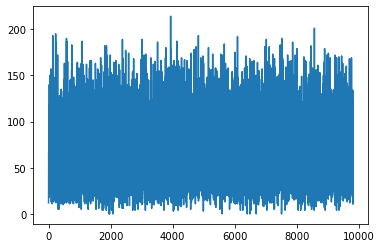

In [19]:
# Plot of length of reviews
senlen = [len(train_sentences[i]) for i in range(len(train_sentences))]

import matplotlib.pyplot as plt

plt.plot(np.arange(len(senlen)),senlen)

In [20]:
import sys
import numpy as np
import random as rn
import pandas as pd
import torch
#from pytorch_pretrained_bert import BertModel
from torch import nn
#from pytorch_pretrained_bert import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline


In [21]:
! pip install transformers

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [22]:
from transformers import BertTokenizer, BertModel, BertConfig
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [23]:
# Tokenizing inputs and adding special tokens
def input_id(input_review):
    input_ids = []
    MAX_LEN = 256
    for r in input_review:
        encoded_sent = tokenizer.encode(
                        r,                      # Sentence which are encoding.
                        add_special_tokens = True) # Adding special tokens '[CLS]' and '[SEP]'
        input_ids.append(encoded_sent)
    return input_ids
train_id = input_id(train_sentences)
val_id = input_id(validation_sentences)

In [25]:
# Padding the Tokenized IDs

from keras.preprocessing.sequence import pad_sequences
padded_train_id = pad_sequences(train_id, maxlen=256 , truncating="post", padding="post")
padded_val_id = pad_sequences(val_id, maxlen=256 , truncating="post", padding="post")


In [26]:
# Masking the padded ID's

def masking(pid):
    attention_masks = []

    for r in pid:
    
        # Generating attention mask for sentences.
        #   - when there is 0 present as token id we are going to set mask as 0.
        #   - we are going to set mask 1 for all non-zero positive input id.
        att_mask = [int(token_id > 0) for token_id in r]
        attention_masks.append(att_mask)

    return attention_masks

train_mask = masking(padded_train_id)
val_mask = masking(padded_val_id)

In [28]:
#changing the numpy arrays into tensors for working on GPU.
import torch

tr_inputs = torch.tensor(padded_train_id)
val_inputs = torch.tensor(padded_val_id)

tr_labels = torch.tensor(train_labels.reshape(-1, 1)).float()
val_labels = torch.tensor(validation_labels.reshape(-1, 1)).float()

tr_masks = torch.tensor(train_mask)
val_masks = torch.tensor(val_mask)

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Deciding the batch size for training.

batch_size = 8

#DataLoader for our training set.
train_data = TensorDataset(tr_inputs, tr_masks, tr_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# DataLoader for our validation(test) set.
validation_data = TensorDataset(val_inputs, val_masks, val_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [29]:
# Building custom BERT model with additional Classification layer

class BertClassifier(nn.Module):
    
    def __init__(self, n_classes = 2):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(768, n_classes)
        self.softmax = nn.Softmax(dim=1)
  
    def forward(self, input_ids, attention_mask):
        
        _, pooled_output = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask
    )
        output = self.drop(pooled_output)
        #print(torch.max(output,dim = 1))
        return self.out(output)

In [30]:
# Checking for GPU processors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

torch.cuda.empty_cache()     # Clearing Cache space for fresh Model run


In [31]:
# Assigning model to GPU
model = BertClassifier()
model = model.to(device)

In [32]:

EPOCHS = 5

optimizer = Adam(model.parameters(), lr=3e-6)
total_steps = len(train_dataloader) * EPOCHS
loss_fn = nn.CrossEntropyLoss().to(device)

In [33]:
# Training the Model

for epoch_num in range(EPOCHS):
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, targets = tuple(t.to(device).long() for t in batch_data)

        outputs = model(
      token_ids,
      masks
    )
        #print(len(targets))
        targets = targets.reshape((1,len(targets)))

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets[0])

        train_loss += loss.item()
        
        
        model.zero_grad()
        loss.backward()
        

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_data) / batch_size, train_loss / (step_num + 1)))

Epoch:  5
1225/1225.125 loss: 0.5042241331445111 


In [34]:
# Evaluating and Predicting the Movie Ratings for Validation data

model.eval()
bert_predicted = []
with torch.no_grad():
    for step_num, batch_data in enumerate(validation_dataloader):
        token_ids, masks, targets = tuple(t.to(device).long() for t in batch_data)

        outputs = model(
      token_ids,
      masks
    )
        
        targets = targets.reshape((1,len(targets)))

        _, preds = torch.max(outputs, dim=1)
        bert_predicted.append(preds)
    
pred = []
for i in range(len(bert_predicted)):
    for j in range(len(bert_predicted[i])):
        pred.append(bert_predicted[i][j])
    
pred = torch.tensor(pred).numpy()       

In [35]:
print(classification_report(val_labels, pred))

              precision    recall  f1-score   support

         0.0       0.69      0.53      0.60      1226
         1.0       0.62      0.76      0.68      1225

    accuracy                           0.64      2451
   macro avg       0.65      0.64      0.64      2451
weighted avg       0.65      0.64      0.64      2451



## Below code is used only for miscellaneous comparison of accuracies with Word Emedding, LSTM, GRU and Glove Embedding models.

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
# tokenize sentences
tokenizer = Tokenizer(num_words = 1500)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=120)

# convert validation dataset to sequence and pad sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding='post', maxlen=120)

In [39]:
# Word Embedding

# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index), output_dim= 100, input_length=120),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 100)          1591200   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                2424      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 1,593,649
Trainable params: 1,593,649
Non-trainable params: 0
_________________________________________________________________


In [41]:
# fit model
num_epochs = 10
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2)

# predict values
pred = model.predict(validation_padded)

Epoch 1/10
245/245 - 4s - loss: 0.6932 - accuracy: 0.5043 - val_loss: 0.6929 - val_accuracy: 0.5135
Epoch 2/10
245/245 - 3s - loss: 0.6930 - accuracy: 0.5068 - val_loss: 0.6927 - val_accuracy: 0.5135
Epoch 3/10
245/245 - 3s - loss: 0.6926 - accuracy: 0.5157 - val_loss: 0.6925 - val_accuracy: 0.4870
Epoch 4/10
245/245 - 3s - loss: 0.6882 - accuracy: 0.5575 - val_loss: 0.6853 - val_accuracy: 0.5446
Epoch 5/10
245/245 - 4s - loss: 0.6593 - accuracy: 0.6298 - val_loss: 0.6595 - val_accuracy: 0.6226
Epoch 6/10
245/245 - 4s - loss: 0.6139 - accuracy: 0.6728 - val_loss: 0.6495 - val_accuracy: 0.6262
Epoch 7/10
245/245 - 4s - loss: 0.5848 - accuracy: 0.6909 - val_loss: 0.6554 - val_accuracy: 0.6232
Epoch 8/10
245/245 - 4s - loss: 0.5656 - accuracy: 0.7096 - val_loss: 0.6598 - val_accuracy: 0.6262
Epoch 9/10
245/245 - 3s - loss: 0.5587 - accuracy: 0.7134 - val_loss: 0.6667 - val_accuracy: 0.6283
Epoch 10/10
245/245 - 4s - loss: 0.5504 - accuracy: 0.7147 - val_loss: 0.6848 - val_accuracy: 0.6130

In [43]:
pred = [1 if i > 0.5 else 0 for i in pred]
print(classification_report(validation_labels, pred))

              precision    recall  f1-score   support

           0       0.63      0.53      0.58      1226
           1       0.59      0.68      0.63      1225

    accuracy                           0.61      2451
   macro avg       0.61      0.61      0.60      2451
weighted avg       0.61      0.61      0.60      2451



In [44]:
# LSTM
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index), output_dim= 100, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 100)          1591200   
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          84480     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 1,718,481
Trainable params: 1,718,481
Non-trainable params: 0
_________________________________________________________________


In [45]:
# fit model
num_epochs = 10
history1 = model1.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2)

# predict values
pred1 = model1.predict(validation_padded)

Epoch 1/10
245/245 - 10s - loss: 0.6727 - accuracy: 0.5760 - val_loss: 0.6569 - val_accuracy: 0.6165
Epoch 2/10
245/245 - 8s - loss: 0.5992 - accuracy: 0.6810 - val_loss: 0.6611 - val_accuracy: 0.6114
Epoch 3/10
245/245 - 9s - loss: 0.5452 - accuracy: 0.7309 - val_loss: 0.6980 - val_accuracy: 0.6084
Epoch 4/10
245/245 - 9s - loss: 0.5011 - accuracy: 0.7545 - val_loss: 0.7414 - val_accuracy: 0.5895
Epoch 5/10
245/245 - 8s - loss: 0.4611 - accuracy: 0.7865 - val_loss: 0.8686 - val_accuracy: 0.5839
Epoch 6/10
245/245 - 8s - loss: 0.4192 - accuracy: 0.8098 - val_loss: 0.8899 - val_accuracy: 0.5778
Epoch 7/10
245/245 - 8s - loss: 0.3776 - accuracy: 0.8293 - val_loss: 0.9513 - val_accuracy: 0.5931
Epoch 8/10
245/245 - 8s - loss: 0.3295 - accuracy: 0.8509 - val_loss: 1.1621 - val_accuracy: 0.5793
Epoch 9/10
245/245 - 8s - loss: 0.2877 - accuracy: 0.8622 - val_loss: 1.2565 - val_accuracy: 0.5701
Epoch 10/10
245/245 - 8s - loss: 0.2476 - accuracy: 0.8828 - val_loss: 1.3770 - val_accuracy: 0.585

In [46]:
pred1 = [1 if i > 0.5 else 0 for i in pred1]
print(classification_report(validation_labels, pred1))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1226
           1       0.57      0.52      0.54      1225

    accuracy                           0.57      2451
   macro avg       0.57      0.57      0.56      2451
weighted avg       0.57      0.57      0.56      2451



In [47]:
# GRU

model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index), output_dim= 100, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 100)          1591200   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               63744     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,658,065
Trainable params: 1,658,065
Non-trainable params: 0
_________________________________________________________________


In [48]:
# fit model
num_epochs = 10
history3 = model3.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2)

# predict values
pred3 = model3.predict(validation_padded)

Epoch 1/10
245/245 - 6s - loss: 0.6738 - accuracy: 0.5698 - val_loss: 0.6645 - val_accuracy: 0.6002
Epoch 2/10
245/245 - 6s - loss: 0.6009 - accuracy: 0.6753 - val_loss: 0.6680 - val_accuracy: 0.6068
Epoch 3/10
245/245 - 6s - loss: 0.5464 - accuracy: 0.7202 - val_loss: 0.6884 - val_accuracy: 0.5992
Epoch 4/10
245/245 - 6s - loss: 0.4926 - accuracy: 0.7511 - val_loss: 0.7681 - val_accuracy: 0.5778
Epoch 5/10
245/245 - 6s - loss: 0.4390 - accuracy: 0.7824 - val_loss: 0.8735 - val_accuracy: 0.5839
Epoch 6/10
245/245 - 6s - loss: 0.3770 - accuracy: 0.8119 - val_loss: 1.0145 - val_accuracy: 0.5716
Epoch 7/10
245/245 - 6s - loss: 0.3260 - accuracy: 0.8370 - val_loss: 1.1451 - val_accuracy: 0.5722
Epoch 8/10
245/245 - 6s - loss: 0.2774 - accuracy: 0.8543 - val_loss: 1.3921 - val_accuracy: 0.5604
Epoch 9/10
245/245 - 6s - loss: 0.2468 - accuracy: 0.8732 - val_loss: 1.6519 - val_accuracy: 0.5609
Epoch 10/10
245/245 - 6s - loss: 0.2086 - accuracy: 0.8897 - val_loss: 1.8792 - val_accuracy: 0.5609

In [49]:
pred3 = [1 if i > 0.5 else 0 for i in pred3]
print(classification_report(validation_labels, pred3))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1226
           1       0.56      0.54      0.55      1225

    accuracy                           0.56      2451
   macro avg       0.56      0.56      0.56      2451
weighted avg       0.56      0.56      0.56      2451



In [52]:
embeddings_index = {}
with open('/kaggle/input/glove-embeddings/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embeddings_matrix = np.zeros((len(word_index) + 1, 100))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [53]:
# model initialization
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index)+1, output_dim= 100, input_length=120, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model4.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 100)          1591300   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                2424      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 1,593,749
Trainable params: 2,449
Non-trainable params: 1,591,300
_________________________________________________________________


In [54]:
# fit model
num_epochs = 10
history4 = model4.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2)

# predict values
pred4 = model4.predict(validation_padded)

Epoch 1/10
245/245 - 1s - loss: 0.6911 - accuracy: 0.5263 - val_loss: 0.6877 - val_accuracy: 0.5553
Epoch 2/10
245/245 - 1s - loss: 0.6831 - accuracy: 0.5774 - val_loss: 0.6800 - val_accuracy: 0.5706
Epoch 3/10
245/245 - 1s - loss: 0.6756 - accuracy: 0.5834 - val_loss: 0.6746 - val_accuracy: 0.5727
Epoch 4/10
245/245 - 1s - loss: 0.6699 - accuracy: 0.5918 - val_loss: 0.6732 - val_accuracy: 0.5722
Epoch 5/10
245/245 - 1s - loss: 0.6664 - accuracy: 0.5954 - val_loss: 0.6698 - val_accuracy: 0.5778
Epoch 6/10
245/245 - 1s - loss: 0.6637 - accuracy: 0.5964 - val_loss: 0.6719 - val_accuracy: 0.5844
Epoch 7/10
245/245 - 1s - loss: 0.6615 - accuracy: 0.6024 - val_loss: 0.6654 - val_accuracy: 0.5834
Epoch 8/10
245/245 - 1s - loss: 0.6597 - accuracy: 0.6055 - val_loss: 0.6651 - val_accuracy: 0.5880
Epoch 9/10
245/245 - 1s - loss: 0.6576 - accuracy: 0.6091 - val_loss: 0.6641 - val_accuracy: 0.5864
Epoch 10/10
245/245 - 1s - loss: 0.6568 - accuracy: 0.6074 - val_loss: 0.6651 - val_accuracy: 0.5905

In [55]:
pred4 = [1 if i >= 0.5 else 0 for i in pred4]
print(classification_report(validation_labels, pred4))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1226
           1       0.59      0.56      0.58      1225

    accuracy                           0.58      2451
   macro avg       0.58      0.58      0.58      2451
weighted avg       0.58      0.58      0.58      2451

